# Predicting Customer Churn
## Using Python to build the machine learning models

Churn Analytics is essential for a business who wants to keep their customers. Because the acquisition of new customers could be more expensive than keeping the old ones, the business always wants to predict a customer's churn before it happens so we can take actions.

Fortunately, we have lots of touchpoints of our current customers, which allows us to build a model using data analytics tools. Also, we can discover the driver of churn so that we can improve products and services in the future.

In this project, we help a telecom company to find out the driver of the customer churn and build a model to predict the churn. We use python and relevant data analytics package. The dataset we use in the notebook is not real customer data, and all the results are only for demonstration purpose.

* Note: This is an legacy notebook which contains some mistakes when I built the model.

* 2019-11-9 Try to fix the errors

## Table of Content:
1. [Exploratory Data Analysis](#first-bullet)  
  1.1 [Exploratory Data Analysis](#1.1)  
  1.2 [Churn by state](#1.2)  
  1.3 [Identifying the key drivers by grouping the data](#1.3)  
  1.4 [Furthur confirmation of the key drivers](#1.4)  
  1.5 [Interaction of the key drivers](#1.5)  
  1.6 [The distribution of the features](#1.6)  
2. [Building a predictive model](#second-bullet)  
  2.1 [Encoding the features](#2.1)  
  2.2 [Feature scaling](#2.2)  
  2.3 [Training a predition model](#2.3) 
3. [Improving the model](#third-bullet)  
  3.1 [Model tuning](#3.1)  
  3.2 [Data pipeline](#3.2)  
  3.3 [Undersampling](#3.3) 

<a class="anchor" id="first-bullet"></a>

## 1. Exploratory Data Analysis 


The following code section performs the exploratory analysis to our demonstrative dataset. From the analysis, we can see the features and data format.

The dataset contains 3000+ rows of customers' information, which is only a fraction of a real company. 

<a class="anchor" id="1.1"></a>

### 1.1 Exploring the dataset
In each row, we have the information on one individual customer. Most of the features are in numeric format, while features like "Churn," "Intl_Plan," "Vmail_Plan" that are in string format like "yes" and "no." Finally, we have customers identification like "Area_Code" Phone" and the "State" that they are living.

In [1]:
# import essential packages for data analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Churn.csv")
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [56]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [57]:
df.Area_Code.unique()

array([415, 408, 510])

In [105]:
#Change area code to string, so we can make it categorical in the future
df.Area_Code = df.Area_Code.to_string()

* The "State" column is obviously wrong, because there are only three area codes and they all belong to California. We will not use states column in the predictive model

In [61]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

<a class="anchor" id="1.2"></a>

### 1.2 Churn by state

By pivoting the dataset, we group the customers into state and calculate the churn rate for each state. We can see that California has the highest churn rate, which is almost 5 times of Hawaii's. The reason could be the habits of customers, the performance of the local teams, or the competitive landscape of each state. 

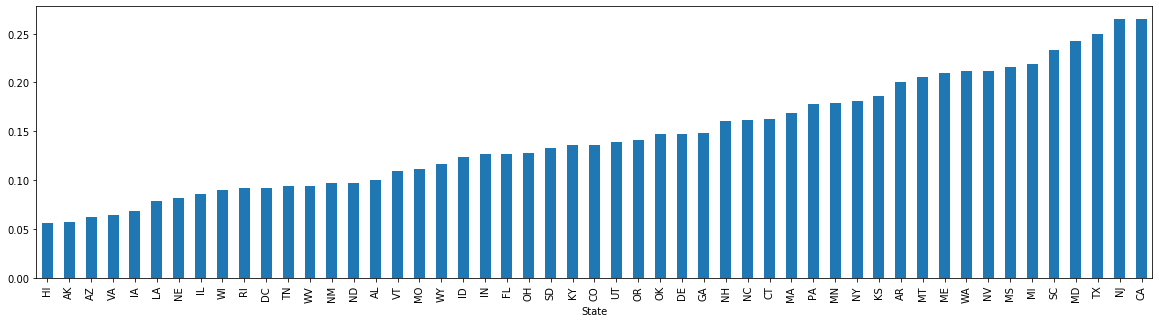

In [62]:
df_states = df.pivot_table(index='State',columns='Churn',values='Phone',aggfunc='count')
df_states['churn_rate'] = df_states['yes'] / (df_states['no'] + df_states['yes'])
df_states.sort_values('churn_rate')['churn_rate'].plot(kind="bar",figsize=(20,5))
plt.show()


<a class="anchor" id="1.3"></a>



### 1.3 Identifying the key drivers by grouping the data

By grouping the data into two categories - churn or not - we can see each group have differences in some of the features. Churned customers have more customer service calls, more usage during the day, but they have less international calls and voice mail messages.

In [63]:
df_churn = df.groupby(['Churn']).mean().transpose()
df_churn.head()

Churn,no,yes
Account_Length,100.793684,102.664596
Vmail_Message,8.604561,5.115942
Day_Mins,175.175754,206.914079
Eve_Mins,199.043298,212.410145
Night_Mins,200.133193,205.231677


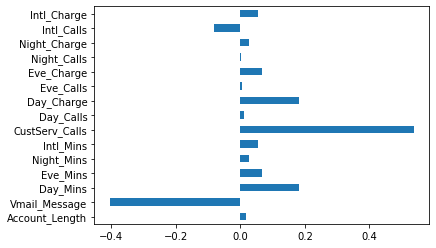

In [64]:
df_churn['difference'] = (df_churn['yes'] - df_churn['no']) / df_churn['no']
df_churn['difference'].plot(kind="barh")
plt.show()

<a class="anchor" id="1.4"></a>


### 1.4 Furthur confirmation of the key drivers

We can also use boxplot to check the distribution of the values. From the charts below, we can confirm that the four features do have an impact on churn behaviour.

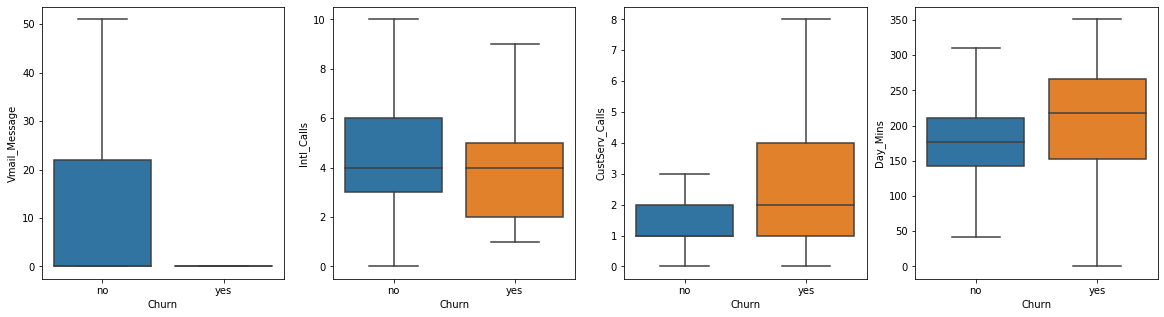

In [65]:
f, axs = plt.subplots(1,4,figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(x='Churn',y='Vmail_Message', data=df, sym="")
plt.subplot(1,4,2)
sns.boxplot(x='Churn',y='Intl_Calls', data=df, sym="")
plt.subplot(1,4,3)
sns.boxplot(x='Churn',y='CustServ_Calls', data=df, sym="")
plt.subplot(1,4,4)
sns.boxplot(x='Churn',y='Day_Mins', data=df, sym="")
plt.show()

<a class="anchor" id="1.5"></a>


### 1.5 Interaction of the key drivers

Regarding the interactions among key drivers, we can see that the number of customer's call does not relate with voice mail plan, but it does relate to the international plan, while the customers with no voice plan or international plan and using more day minutes are more likely to churn.

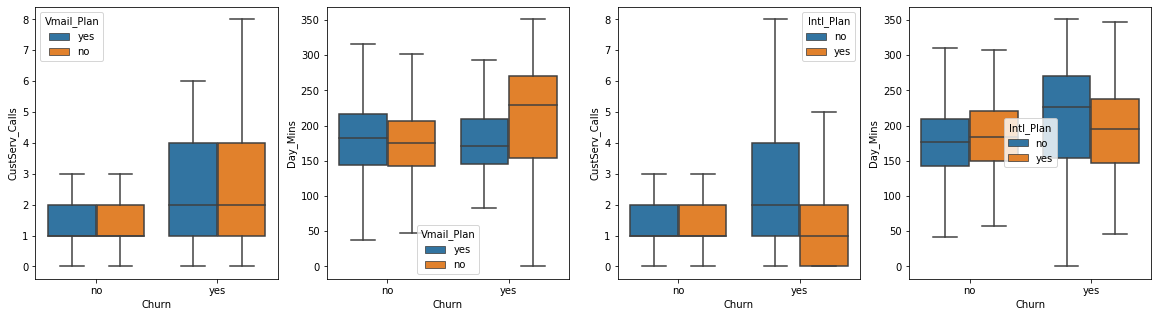

In [66]:
f, axs = plt.subplots(1,4,figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(x='Churn',y='CustServ_Calls', data=df, sym="",hue="Vmail_Plan")
plt.subplot(1,4,2)
sns.boxplot(x='Churn',y='Day_Mins', data=df, sym="",hue="Vmail_Plan")
plt.subplot(1,4,3)
sns.boxplot(x='Churn',y='CustServ_Calls', data=df, sym="",hue="Intl_Plan")
plt.subplot(1,4,4)
sns.boxplot(x='Churn',y='Day_Mins', data=df, sym="",hue="Intl_Plan")
plt.show()

<a class="anchor" id="1.6"></a>



### 1.6 The distribution of the features

As we can see from the chart, the usage of daily minutes looks like a normal distribution, but the other 3 features are highly skewed, and all 4 features have very different scales.

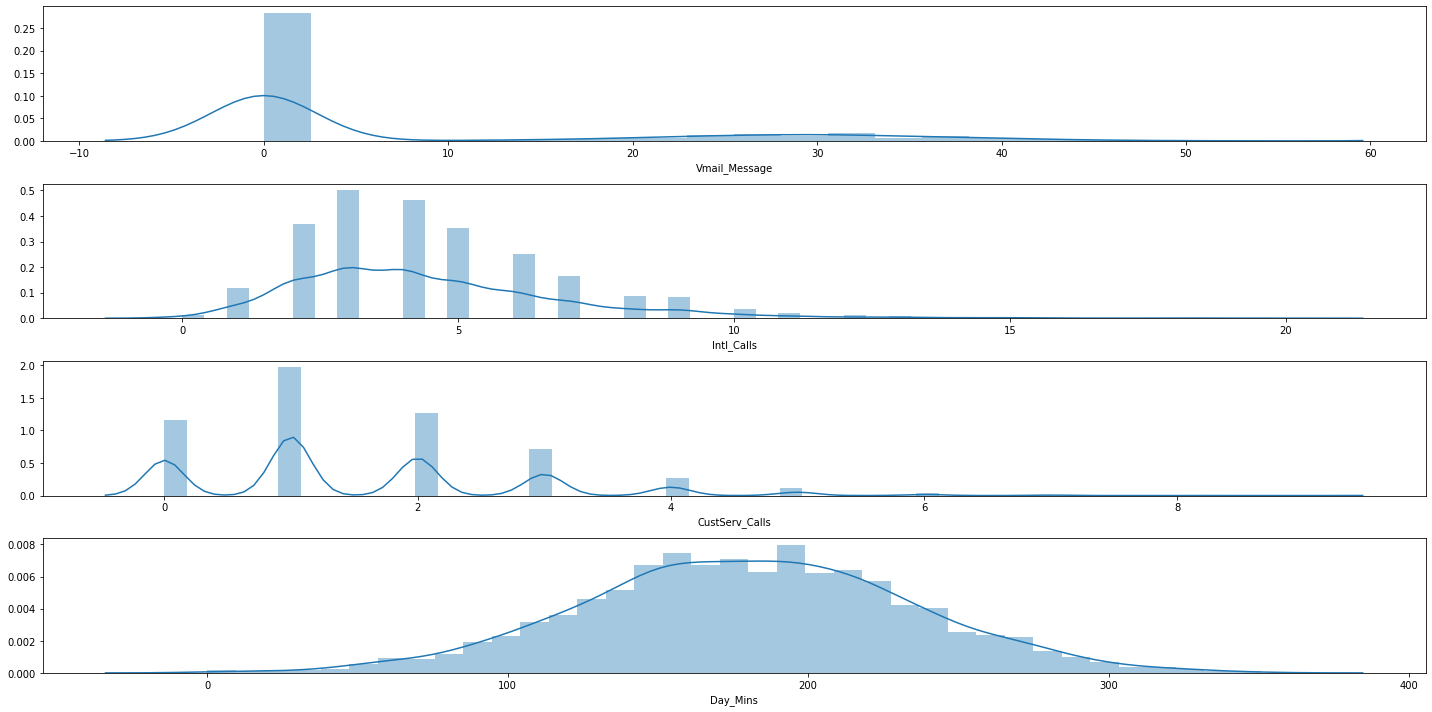

In [67]:
f, axs = plt.subplots(1,4,figsize=(20,10))
plt.subplot(4,1,1)
sns.distplot(df['Vmail_Message'])
plt.subplot(4,1,2)
sns.distplot(df['Intl_Calls'])
plt.subplot(4,1,3)
sns.distplot(df['CustServ_Calls'])
plt.subplot(4,1,4)
sns.distplot(df['Day_Mins'])
plt.tight_layout()
plt.show()

<a class="anchor" id="second-bullet"></a>


## 2. Building a predictive model


<a class="anchor" id="2.1"></a>

### 2.1 Encoding the features

Before feeding the dataset to our machine learning algorithms, we need to encode the features in string format to numeric ones. The binary features and target - "Churn" column are assigned the value 1 and 0 instead of "yes" and "no." The area code and phone number are joint together and kept in a separate data frame df_ID. We apply one-hot encoding on the "State" feature and join results with the rest numeric features.

Now we have a features data frame df_features, a target data frame df_churn, and an ID data frame df_ID generated for further analysis.

In [78]:
df_features = df.copy()

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
df_features['Vmail_Plan'] = df['Vmail_Plan'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intl_Plan'
df_features['Intl_Plan'] = df['Intl_Plan'].replace({'no':0, 'yes':1})

df_features = df_features.drop(['State', 'Area_Code', 'Phone','Churn'], axis =1)

df_features = pd.concat([df_features, pd.get_dummies(df['Area_Code'], drop_first=True)], axis=1)


In [79]:
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
df_churn = df['Churn'].replace({'no':0, 'yes':1})

df_ID = df['Area_Code'].astype('str') + "-" + df['Phone']

In [80]:
df_features.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,415,510
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,1,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,1,0


In [83]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [84]:
numeric_features = ['Account_Length',  'Vmail_Message',       'Day_Mins',       'Eve_Mins',
           'Night_Mins',      'Intl_Mins', 'CustServ_Calls',            'Day_Calls',     'Day_Charge',      'Eve_Calls',
           'Eve_Charge',    'Night_Calls',   'Night_Charge',     'Intl_Calls',
          'Intl_Charge']

In [85]:
categorical_features = ['Intl_Plan', 'Vmail_Plan','415','510']

<a class="anchor" id="2.2"></a>


### 2.2 Feature scaling

Since the features have different scales, we use StandardScaler to rescale them.

In [86]:
from sklearn.preprocessing import StandardScaler

df_numeric_scaled = pd.DataFrame(StandardScaler().fit_transform(df_features[numeric_features]),columns = numeric_features)

In [88]:
df_features_scaled = pd.concat([df_numeric_scaled,df_features[categorical_features]], axis=1)

In [89]:
df_features_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
Account_Length    3333 non-null float64
Vmail_Message     3333 non-null float64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null float64
Day_Calls         3333 non-null float64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null float64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null float64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null float64
Intl_Charge       3333 non-null float64
Intl_Plan         3333 non-null int64
Vmail_Plan        3333 non-null int64
415               3333 non-null uint8
510               3333 non-null uint8
dtypes: float64(15), int64(2), uint8(2)
memory usage: 449.3 KB


In [90]:
df_features_scaled.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Intl_Plan,Vmail_Plan,415,510
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,0,1,1,0
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,0,1,1,0
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,0,0,1,0
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,1,0,0,0
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,1,0,1,0


<a class="anchor" id="2.3"></a>



### 2.3 Training a predition model

We start to try with Logistic Regression and Random Forest Classifier and see what happens.

From the accuracy score, we can tell that our models work pretty well. However, if we look into the confusion matrix, we can see a problem - there are too many false negatives. In this case, it means that many customers that are going to churn but our model fails to find out by labelling them as "not churn."

As we know, it is much harder to acquire a new customer than to keep a current one. We want our model to be more sensitive, and a little bit over-sensitive does not matter, because it does not cause any harm if we give a customer who is not going to churn extra attention or a coupon - it only increases their level of loyalty. 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression(solver = 'lbfgs')

X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_churn, test_size = 0.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_test, y_test)


0.857

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_churn, test_size = 0.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.956

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[839,   7],
       [ 37, 117]])

In [94]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9435483870967742
0.7597402597402597


Here are some other metrics to give us more ideas about how the models work.

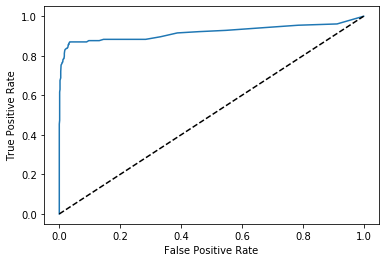

In [95]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [96]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.9185126339381658

In [97]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8417266187050361

<a class="anchor" id="third-bullet"></a>


## 3. Improving the model


<a class="anchor" id="3.1"></a>

### 3.1 Model tuning

The default hyperparameters used by our models may not be optimized for our data, so we apply grid search cross-validation to identify the hyperparameters that optimize the performances. The result shows that by applying the new hyperparameters, our performance has been slightly improved.

In [98]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              "max_depth": [3, None],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the optimal parameters
print(grid_search.best_params_)

/home/paul/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}


In [99]:
clf = RandomForestClassifier(n_estimators = 100,bootstrap = False, criterion = 'gini', max_depth = None, max_features = 'sqrt')

X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df_churn, test_size = 0.3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


0.961
0.9285714285714286
0.7703703703703704


<a class="anchor" id="3.2"></a>


### 3.2 Data pipeline

To put our model into use, we need a pipeline that performs the scaling on the new data and then feeds in the model.

In [100]:
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
        ('rfc', RandomForestClassifier(n_estimators = 100,
                                       bootstrap = False, 
                                       criterion = 'gini', 
                                       max_depth = None, 
                                       max_features = 'sqrt'))]

pipeline = Pipeline(steps)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_churn, test_size = 0.3)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.score(X_test, y_test))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.953
0.9391304347826087
0.7297297297297297


<a class="anchor" id="3.3"></a>

### 3.3 Under-sampling

Finally, we use under-sampling to increase the sensitivity of our model. Now our model has fewer false negatives and more false positive, which is exactly what we want.

In [102]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.8

rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X_train, y_train)

pipeline.fit(X_res, y_res)
y_pred = pipeline.predict(X_test)

print(pipeline.score(X_test, y_test))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


Using TensorFlow backend.
0.915
0.6684491978609626
0.8445945945945946


In [103]:
confusion_matrix(y_test, y_pred)

array([[790,  62],
       [ 23, 125]])